In [1]:
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, normalize
from sklearn.metrics import accuracy_score,plot_confusion_matrix, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.random_projection import GaussianRandomProjection as RP

clusterings = ['KMeans','EM']
dimReductions = ['PCA','ICA', 'RP', 'IG']

# data import and preprocessing


In [2]:
##### Adult Income
### http://archive.ics.uci.edu/ml/datasets/Adult
data = pd.read_csv('datafiles/adult.csv')
data

y_data_raw = data.income

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_data_raw.values.tolist())
y_data = le.transform(y_data_raw)


x_data_raw = data.loc[:,'age':'native-country']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(x_data_raw.values.tolist())
x_data = enc.transform(x_data_raw)


# x_data = normalize(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22792, 14) (9769, 14) (22792,) (9769,)


In [3]:
x_data

array([[2.2000e+01, 7.0000e+00, 2.6710e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [3.3000e+01, 6.0000e+00, 2.9260e+03, ..., 0.0000e+00, 1.2000e+01,
        3.9000e+01],
       [2.1000e+01, 4.0000e+00, 1.4086e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       ...,
       [4.1000e+01, 4.0000e+00, 7.8830e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [5.0000e+00, 4.0000e+00, 1.2881e+04, ..., 0.0000e+00, 1.9000e+01,
        3.9000e+01],
       [3.5000e+01, 5.0000e+00, 1.7825e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01]])

In [4]:
y_data_raw

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

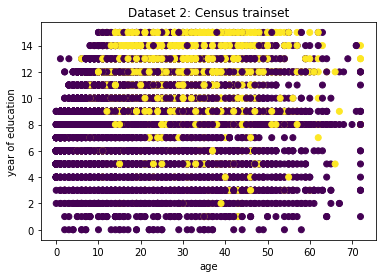

In [5]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset')
plt.xlabel('age')
plt.ylabel('year of education')
# plt.ylabel('fnlwgt')
plt.savefig(f'part2/census.png')
plt.show()

In [6]:
y_test.tolist().count(0)

7377

In [7]:
y_test.tolist().count(1)

2392

# modify thisDR!!!

# modify DR function handle:

from sklearn.decomposition import PCA, FastICA, NMF

from sklearn.random_projection import GaussianRandomProjection as RP

In [8]:
thisDR = 'RP' 
# 'initial' if no DR. Skip section 1 

# x_train_transform = x_train # default for 'initial'
# x_test_transform = x_test # default for 'initial'

# 1. Dimensionality Reduction

In [16]:
################################
DR = RP(n_components = 10,
         random_state = my_random_state)

tic = time.perf_counter() 
DR.fit(x_train)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"Dimensionality Reduction Algorithm training time {toc - tic} seconds")
print()

Dimensionality Reduction Algorithm training time 0.0011766000000079657 seconds



training time 0.0007356999999501568 seconds
[-0.4413008]

training time 0.000701299999946059 seconds
[-0.4413008   0.26067592]

training time 0.0007229000000279484 seconds
[-0.4413008   0.26067592 -1.06392255]

training time 0.0007812000001194974 seconds
[-0.4413008   0.26067592 -1.06392255  0.12678367]

training time 0.0008250000000771252 seconds
[-0.4413008   0.26067592 -1.06392255  0.12678367 -0.1473597 ]

training time 0.0007078999999521329 seconds
[-0.4413008   0.26067592 -1.06392255  0.12678367 -0.1473597  -1.454096  ]

training time 0.0008745000000089931 seconds
[-0.4413008   0.26067592 -1.06392255  0.12678367 -0.1473597  -1.454096
 -0.15360103]

training time 0.0008334999999988213 seconds
[-0.4413008   0.26067592 -1.06392255  0.12678367 -0.1473597  -1.454096
 -0.15360103 -1.13661431]

training time 0.0008176000001185457 seconds
[-0.4413008   0.26067592 -1.06392255  0.12678367 -0.1473597  -1.454096
 -0.15360103 -1.13661431  2.07294129]

training time 0.0008040999998684129 second

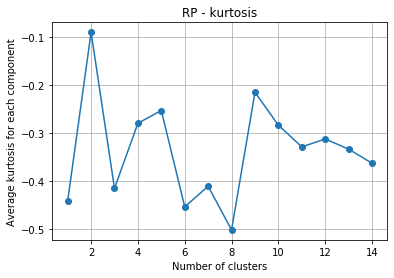

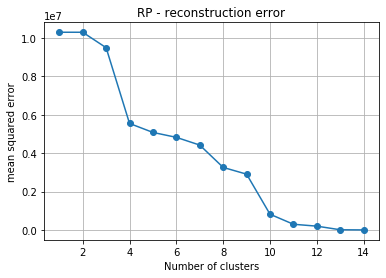

In [13]:
# Kurtosis & Reconstruction Error
numfeatures = x_train.shape[1]
# numfeatures = 16
kurtosis_all = []
mse_all = []
for i in range(1, 1+numfeatures):
    DR = RP(n_components = i, random_state = my_random_state)
    
    tic = time.perf_counter() 
    DR.fit(x_train)
    toc = time.perf_counter() 
    print(f"training time {toc - tic} seconds")
    
    kurt = kurtosis(DR.components_.T)
#     print(DR.components_)
    print(kurt)
    kurtosis_all.append(np.mean(kurt))
    
    x_train_transform = DR.fit_transform(x_train)
    x_train_inverse = np.linalg.pinv(DR.components_.T)
    x_train_reconstruct = x_train_transform.dot(x_train_inverse)
    mse = np.sum(np.square(x_train - x_train_reconstruct))/x_train_reconstruct.size
    mse_all.append(mse)
#     x_test_transform = DR.fit_transform(x_test)
#     x_train_inverse = DR.inverse_transform(x_train_transform)
    print()

plt.figure()
plt.plot(range(1,1+numfeatures), kurtosis_all, marker = 'o')
plt.title(f'{thisDR} - kurtosis')
plt.xlabel('Number of clusters')
plt.ylabel('Average kurtosis for each component')
plt.grid()
plt.savefig(f'part2/{thisDR}_kurtosis.png')
plt.show()


plt.figure()
plt.plot(range(1,1+numfeatures), mse_all, marker = 'o')
plt.title(f'{thisDR} - reconstruction error')
plt.xlabel('Number of clusters')
plt.ylabel('mean squared error')
plt.grid()
plt.savefig(f'part2/{thisDR}_mse.png')
plt.show()

In [ ]:
DR.explained_variance_ratio_

In [18]:
###############################

best_n_components = 10
bestDR = RP(n_components=best_n_components, random_state = my_random_state)
x_train_transform = bestDR.fit_transform(x_train)
x_test_transform = bestDR.fit_transform(x_test)

x_train_inverse = np.linalg.pinv(bestDR.components_.T)
x_train_reconstruct = x_train_transform.dot(x_train_inverse)
# Reconstruction Error
mse = np.sum(np.square(x_train - x_train_reconstruct))/x_train_reconstruct.size
print('MSE: ', mse)
#  MSE:  818349.3903048245 for n=10

MSE:  818349.3903048245


In [19]:
x_train_transform

array([[-2999.67795811,  1171.83927947,  3630.91676168, ...,
         6010.64988646, -1114.39343254,  4906.84013723],
       [-1283.50405051,   503.4614612 ,  1557.63001342, ...,
         2548.81508854,  -467.81394597,  2091.82858431],
       [-2487.26176009,   969.67462605,  3007.32439742, ...,
         4958.0533259 ,  -917.07378457,  4052.18988287],
       ...,
       [ -575.12799952,   219.72397301,   691.63905157, ...,
         1084.57785268,  -195.89812539,   912.22508231],
       [-1863.55556263,   730.92709552,  2250.38266677, ...,
         3707.48751034,  -679.27727096,  3030.25980048],
       [-1601.86335232,   630.19543134,  1952.1685145 , ...,
         3221.94866491,  -592.92676687,  2631.4013578 ]])

In [21]:
x_train_reconstruct

array([[  507.82766137,   144.4502532 , 11885.23611584, ...,
          535.04849932,  -426.00654233, -1037.11961012],
       [  224.73036949,    61.95078463,  5037.34317064, ...,
          231.86090003,  -160.75558475,  -424.53493704],
       [  431.16909337,   119.05530261,  9803.14515407, ...,
          443.28055522,  -335.76735522,  -852.64617719],
       ...,
       [  122.96744567,    28.9116497 ,  2149.48281702, ...,
          102.82874052,   -38.06662361,  -166.71473507],
       [  320.46556788,    89.16227909,  7327.59726267, ...,
          334.40344872,  -249.07769732,  -626.9321056 ],
       [  268.10774609,    77.8355716 ,  6358.02404904, ...,
          290.21849208,  -216.99140699,  -536.89828316]])

# 2. after dimensional reduction: KMeans

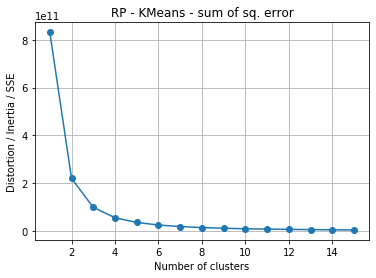

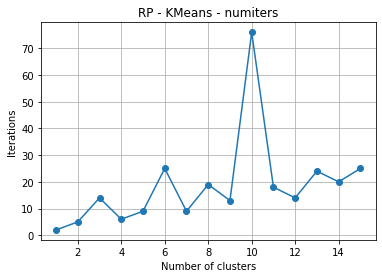

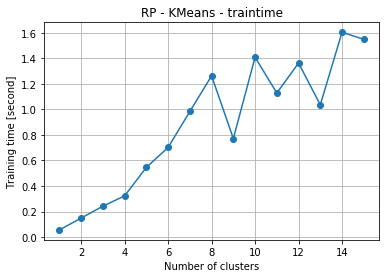

In [22]:
thisClust = 'KMeans'
# calculate distortion for a range of number of cluster
distortions = []
numiters = []
traintime = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, 
                random_state=my_random_state)
    
    tic = time.perf_counter() 
    km.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    distortions.append(km.inertia_)
    numiters.append(km.n_iter_)

# plot
plt.figure()
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion / Inertia / SSE')
plt.title(f'{thisDR} - {thisClust} - sum of sq. error')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_distortion.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 16), numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of clusters')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 16), traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of clusters')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## KMeans n=2
### compare with original labeling

In [24]:
km2 = KMeans(n_clusters = 2, random_state = my_random_state)


tic = time.perf_counter() 
km2.fit(x_train_transform)
toc = time.perf_counter() 
print(f"training time {toc - tic} seconds")
print()

print(km2.cluster_centers_)
print(km2.labels_)
print(km2.inertia_)
print(km2.n_iter_)

training time 0.1689516999999796 seconds

[[-3698.91444939  1447.10283932  4472.56187058  9746.18522861
  -2407.64140771  3045.30299618 -3475.86205083  7415.76014306
  -1375.27609015  6044.55669528]
 [-1294.2709857    506.16707789  1567.03505736  3352.66225952
   -837.47007592  1043.3239825  -1218.75452324  2562.37644655
   -471.16867521  2106.02762044]]
[0 1 1 ... 1 1 1]
219825368498.3303
5


In [25]:
km2.labels_.tolist().count(1)

11760

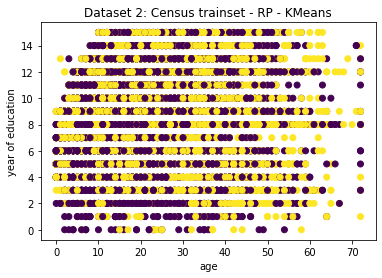

In [26]:

plt.scatter(x_train[:,0],x_train[:,4], c=km2.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

[[8483 8860]
 [2549 2900]]
Prediction accuracy on train set: 0.4994296244296244


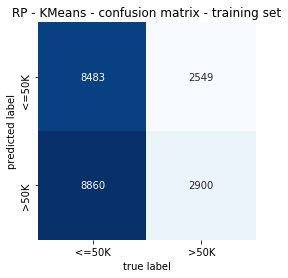

In [27]:
species = ['<=50K','>50K']

y_train_km2 = []
for l in km2.labels_:
    y_train_km2.append(species[l])
    
train_confmat_km2 = confusion_matrix(y_train, km2.labels_)
train_accu_km2 = accuracy_score(y_train, km2.labels_)
print(train_confmat_km2)
print(f"Prediction accuracy on train set: {train_accu_km2}")


import seaborn as sns
# species.reverse() # for plotting
sns.heatmap(train_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

In [28]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, km2.labels_)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(y_train, km2.labels_)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  219825368498.3303
Silhouette score:  0.614316878669068
Adjusted Mutual Information (AMI) score:  0.00023177484741942193


In [29]:
tic = time.perf_counter() 
y_test_predict2 = km2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()
y_test_predict2

testing time 0.0018516999998610117 seconds



array([1, 1, 1, ..., 0, 1, 1])

In [30]:
y_test_predict2.tolist().count(0)

4713

[[3583 3794]
 [1130 1262]]
Prediction accuracy on test set: 0.4959565973999386


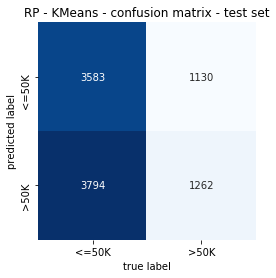

In [31]:

species = ['<=50K','>50K']
y_test_km2 = []
for pred in y_test_predict2:
    y_test_km2.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(le.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


test_confmat_km2 = confusion_matrix(y_test, y_test_predict2)
test_accu_km2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_km2)
print(f"Prediction accuracy on test set: {test_accu_km2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - test set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')



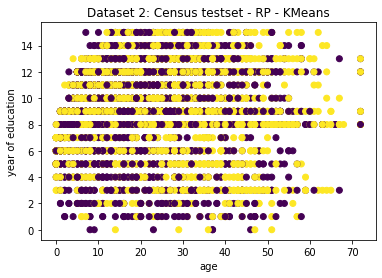

In [32]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()

In [33]:
# Evaluate quality of clusters
print('test set')
import random as rand
y_test_predict2[rand.randint(0,9000)] = 1 # arbitrary, because no 1 was predicted
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.6111070632476462
Adjusted Mutual Information (AMI) score:  2.279299904092081e-05


## KMeans n=? 
### change best_n_clusters!  determined from graph

In [34]:
best_n_clusters = 4
km = KMeans(n_clusters = best_n_clusters, random_state = my_random_state)


tic = time.perf_counter() 
km.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)
print(km.n_iter_)

training time 0.3414631000000554 seconds

[[ -648.1731696    253.41644047   786.92409994  1636.46352457
   -416.06413627   506.03464926  -612.41440708  1259.56230549
   -228.38653659  1048.53467168]
 [-3077.13837509  1203.76384956  3721.24756401  8093.37091053
  -2001.68285248  2527.76809046 -2892.16150132  6160.99558835
  -1141.50794643  5026.22354998]
 [-4363.89050347  1707.339591    5276.06058688 11513.72046031
  -2841.78696586  3598.7562822  -4100.14476834  8757.61981778
  -1625.27487829  7133.61421825]
 [-1863.4270223    728.82521517  2254.23653326  4864.49929236
  -1208.68653738  1516.6327442  -1752.86186139  3710.05717661
   -685.04224203  3037.57818613]]
[1 3 1 ... 0 3 3]
54837977168.008
6


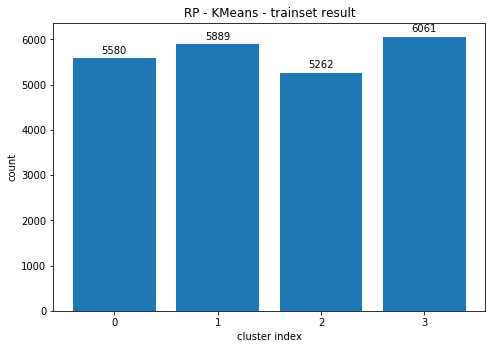

In [35]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in km.labels_:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts)
plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [36]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km.inertia_)
score = silhouette_score(x_train_transform, km.labels_)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), x_train_km)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), km.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  54837977168.008
Silhouette score:  0.5682672646200393
Adjusted Mutual Information (AMI) score:  0.00045128257219140147


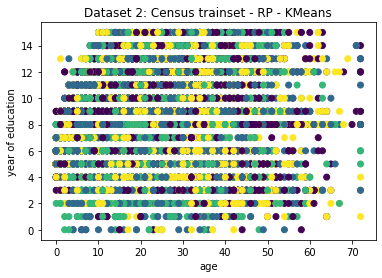

In [37]:

plt.scatter(x_train[:,0],x_train[:,4], c=km.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [38]:


tic = time.perf_counter() 
y_test_predict = km.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.002563300000019808 seconds



array([0, 0, 0, ..., 2, 0, 0])

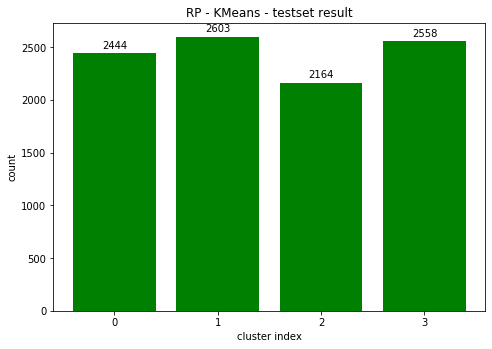

In [39]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [40]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.563301433518827
Adjusted Mutual Information (AMI) score:  -8.938356487957635e-07


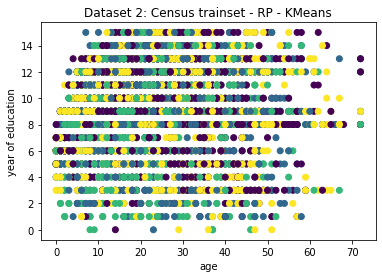

In [41]:

plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()

# 3. after dimensional reduction: Expectation Maximization (EM)

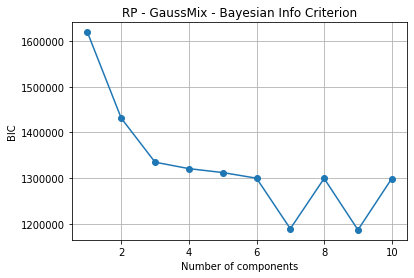

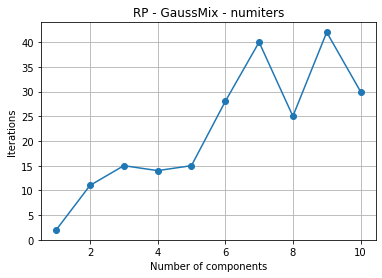

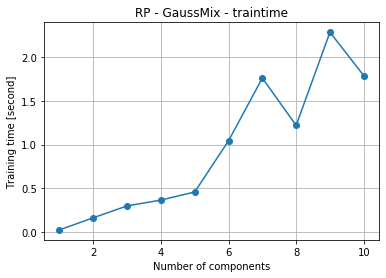

In [42]:
thisClust = 'GaussMix'
#  Find the optimal number of components using BIC
n_components_grid = np.arange(1, 11)
# bic = np.zeros(n_components_grid.size)
bic = []
numiters = []
traintime = []

# for idx, n_components in enumerate(n_components_grid):
for n_components in n_components_grid:
    gm = GaussianMixture(n_components=n_components, random_state=my_random_state)
    
    tic = time.perf_counter() 
    gm.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    numiters.append(gm.n_iter_)
    bic.append(gm.bic(x_train_transform))
#     bic[idx] = gm.bic(x_train)
print()


# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid, bic, marker='o')
# plt.xticks(k_grid)
plt.title(f'{thisDR} - {thisClust} - Bayesian Info Criterion')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_bic.png')

# plot
plt.figure()
plt.plot(n_components_grid, numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of components')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(n_components_grid, traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of components')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## Gaussian Mixture best_n_component = 2
### compare with original labeling

In [43]:
# the best n_clusters determined to be 4 (same as the original labeling)

best_n_component = 2
gm2 = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm2.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict2 = gm2.predict(x_train_transform)
y_train_predict2

training time 0.16817089999995005 seconds



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [45]:
y_train_predict2.tolist().count(1)

19901

[[16138  1205]
 [ 3763  1686]]
Prediction accuracy on train set: 0.782028782028782


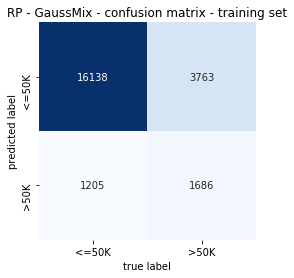

In [62]:
species = ['<=50K','>50K']

# y_train_gm2 = []
# for l in y_train_predict2:
#     y_train_gm2.append(species[l])

y_train_predict2 = -1*(y_train_predict2 - 1) # inverse 0 & 1 if necessary

train_confmat_gm2 = confusion_matrix(y_train, y_train_predict2)
train_accu_gm2 = accuracy_score(y_train, y_train_predict2)
print(train_confmat_gm2)
print(f"Prediction accuracy on train set: {train_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(train_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

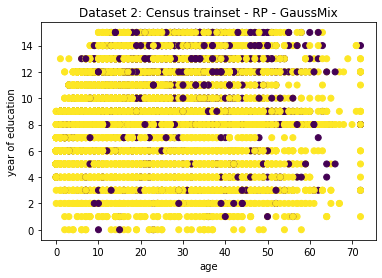

In [47]:

plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

In [48]:
# Evaluate quality of clusters
print('training set')
# print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, y_train_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Silhouette score:  -0.006540073134772034
Adjusted Mutual Information (AMI) score:  0.08694571669796088


In [49]:

tic = time.perf_counter() 
y_test_predict2 = gm2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict2

testing time 0.002266299999973853 seconds



array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [50]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

[[6865  512]
 [1626  766]]
Prediction accuracy on test set: 0.7811444364827516


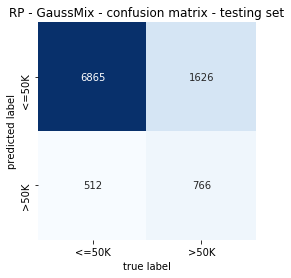

In [63]:
species = ['<=50K','>50K']

y_test_predict2 = -1*(y_test_predict2 - 1) # inverse 0 & 1 if necessary

test_confmat_gm2 = confusion_matrix(y_test, y_test_predict2)
test_accu_gm2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_gm2)
print(f"Prediction accuracy on test set: {test_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - testing set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')

In [52]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  -0.012896713738826322
Adjusted Mutual Information (AMI) score:  0.09315325209611261


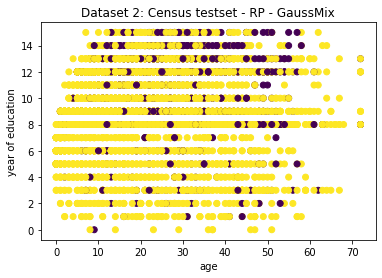

In [53]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()



## Gaussian Mixture best_n_component = ?
### change best_n_component!  determined from graph

In [54]:
best_n_component = 6
gm = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict = gm.predict(x_train_transform)
y_train_predict

training time 1.0668534999999792 seconds



array([5, 2, 5, ..., 5, 5, 5], dtype=int64)

In [55]:
# Evaluate quality of clusters
print('training set')
score = silhouette_score(x_train_transform, y_train_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)
# print(f"Prediction accuracy on train set: {accuracy_score(le.inverse_transform(y_train),y_train_predict)}")

training set
Silhouette score:  -0.07183974747122437
Adjusted Mutual Information (AMI) score:  0.056001121137038666


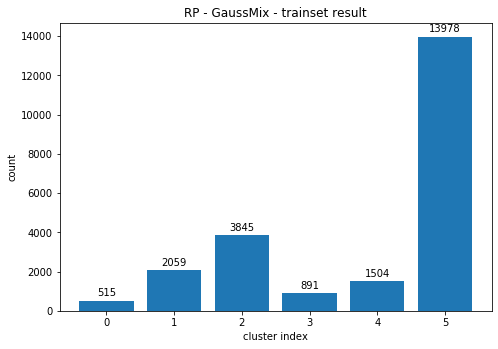

In [56]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for yp in y_train_predict:
    counts[yp] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices,counts)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')
plt.show()

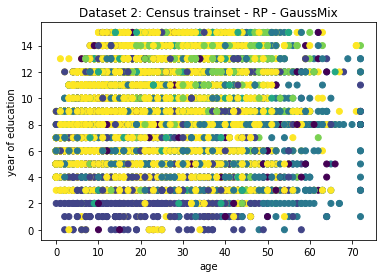

In [57]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [58]:


tic = time.perf_counter() 
y_test_predict = gm.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.006718000000091706 seconds



array([5, 4, 3, ..., 5, 2, 2], dtype=int64)

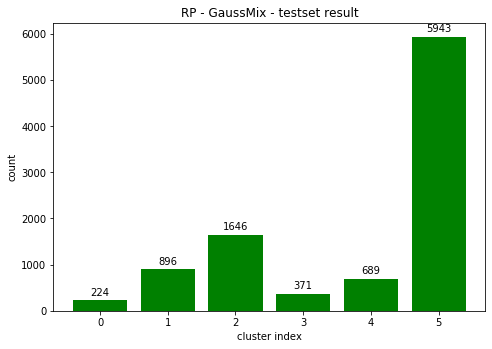

In [59]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [60]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  -0.0796016716929222
Adjusted Mutual Information (AMI) score:  0.0576813619478406


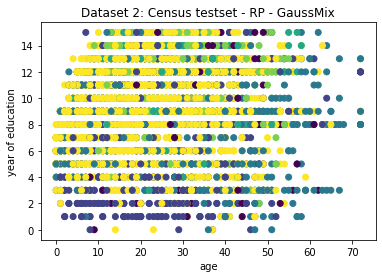

In [61]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()